# SUPPLY CHAIN ANALYTICS - EDA

## Introduction
Data analysis for "Open The Package", will look at supply chain data to optimize inventory levels, delivery times, and reduce transportation costs. By forecasting demand and identifying inefficiencies, I'll align supply chain strategies with business goals and propose strategic improvements. Through insightful dashboards, I'll provide actionable recommendations to enhance supplier relationships, streamline processes, and drive cost-saving solutions, ultimately improving overall business performance.

## Methodology
### 1. Problem Definition
- **Objective:** To analyze the factors contributing to supply chain delays or optimizations and propose actionable strategies to improve retention and performance within the organization.
- **Scope:** Focus on understanding key drivers of supply chain functionality and their impact on business performance.

### 2. Data Collection
- **Source:** https://data.mendeley.com/datasets/8gx2fvg2k6/5 
- **Data Points:** Included  Days for shipping (real), Sales per customer, Late_delivery_risk, Category Id, Customer Id, Order Id, Order Item Quantity, Sales, Product Name, Order Region.
- **Tools Used:** SQL for database queries, Excel for initial data review, Tableau for stakeholder visualizations, Jupyter for EDA and statistical exploration.

### 3. Data Preparation
- **Data Cleaning:** Removed duplicate records, handled missing values by imputation, and ensured consistency in data formats.
- **Segmentation:** Organized data into relevant categories, such as `Department Name`, `Customer Segment`, and `Delivery Status`, to enable focused and insightful analysis tailored to specific business aspects.

### 4. Exploratory Analysis
- **Trend Analysis**: Identified historical trends in delays in shipments and correlated them with external factors such as market conditions or internal events.
- **Visualization**: Used tools like plotly and matplotlib to show initial statistics. Use Tableau to create interactive dashboards that illustrate key findings for stakeholders.

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from scipy.stats import skew, kurtosis
import plotly.graph_objects as go


In [116]:
schain = pd.read_csv('/Users/teitelbaumsair/Desktop/Data Bootcamp Repo/DI_Bootcamp/Data Bootcamp Final Project/Data/DataCoSupplyChainDataset.csv')
schain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 0 non-null       float64
 12  Customer Fname                

In [117]:
schain.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,CASH,2,4,88.790001,239.979996,Advance shipping,0,43,Camping & Hiking,Hickory,USA,NaN,Mary,11599,Malone,NaN,Consumer,NC,8708 Indian Horse Highway,28601.0,7,Fan Shop,35.776661,-81.362625,LATAM,Mexico City,MÈxico,11599,01/01/2015,1,957,60.000000,0.20,1,299.980011,0.37,1,299.980011,239.979996,88.790001,Central America,Distrito Federal,CLOSED,NaN,957,43,NaN,http://images.acmesports.sports/Diamondback+Wo...,Diamondback Women's Serene Classic Comfort Bi,299.980011,0,01/03/2015 00:00,Standard Class
1,PAYMENT,3,4,91.180000,193.990005,Advance shipping,0,48,Water Sports,Chicago,USA,NaN,David,256,Rodriguez,NaN,Consumer,IL,7605 Tawny Horse Falls,60625.0,7,Fan Shop,41.832722,-87.980484,LATAM,Dos Quebradas,Colombia,256,01/01/2015,2,1073,6.000000,0.03,2,199.990005,0.47,1,199.990005,193.990005,91.180000,South America,Risaralda,PENDING_PAYMENT,NaN,1073,48,NaN,http://images.acmesports.sports/Pelican+Sunstr...,Pelican Sunstream 100 Kayak,199.990005,0,01/04/2015 00:21,Standard Class
2,PAYMENT,3,4,36.470001,107.889999,Advance shipping,0,18,Men's Footwear,Chicago,USA,NaN,David,256,Rodriguez,NaN,Consumer,IL,7605 Tawny Horse Falls,60625.0,4,Apparel,41.832722,-87.980484,LATAM,Dos Quebradas,Colombia,256,01/01/2015,2,403,22.100000,0.17,4,129.990005,0.34,1,129.990005,107.889999,36.470001,South America,Risaralda,PENDING_PAYMENT,NaN,403,18,NaN,http://images.acmesports.sports/Nike+Men%27s+C...,Nike Men's CJ Elite 2 TD Football Cleat,129.990005,0,01/04/2015 00:21,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,USA,NaN,Tana,19490,Tate,NaN,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.750000,0.08,1,327.750000,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,NaN,Orli,19489,Hendricks,NaN,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.750000,0.45,1,327.750000,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class


### Data Preparation and Cleaning
- Drop Null Columns: `Customer Email`, `Customer Password`, `Product Description`, `Order Zipcode`.
- Fill Null Values: `Customer Zipcode` (With a series of 0's), `Customer Lname` (With 'No Last Name').
- Check for duplicates and remove them.

In [118]:
schain.duplicated().sum()

np.int64(0)

##### No Duplicate Values

In [119]:
schain.isna().sum()

Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                   180519
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                180519
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [120]:
# Drop Null Columns: `Customer Email`, `Customer Password`, `Product Description`.
schain.drop(columns=['Customer Email', 'Customer Password', 'Product Description','Order Zipcode'], inplace=True)


In [121]:
# Fill Null Values: `Customer Zipcode` (With a series of 0's), `Customer Lname` (With 'No Last Name').
schain = schain.fillna({'Customer Zipcode': 0, 'Customer Lname': 'No Last Name'})

In [122]:
total_nulls = schain.isnull().sum().sum()
print(f"Total number of null values in the DataFrame: {total_nulls}")

Total number of null values in the DataFrame: 0


In [123]:
schain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Fname                 180519 non-null  object 
 12  Customer Id                   

In [124]:
columns_to_change = ['Category Id', 'Customer Id', 'Department Id', 'Order Customer Id', 'Order Id', 'Order Item Cardprod Id', 'Order Item Id', 'Product Card Id', 'Product Category Id']
schain[columns_to_change] = schain[columns_to_change].astype('object')

In [125]:
schain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  object 
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Fname                 180519 non-null  object 
 12  Customer Id                   

In [126]:
schain['order date (DateOrders)'] = schain['order date (DateOrders)'].astype(str)
schain['shipping date (DateOrders)'] = schain['shipping date (DateOrders)'].astype(str)

# Use string slicing to remove everything after the year (to get just MM/DD/YYYY)
schain['order date (DateOrders)'] = schain['order date (DateOrders)'].str.slice(0, 10).str.strip()
schain['shipping date (DateOrders)'] = schain['shipping date (DateOrders)'].str.slice(0, 10).str.strip()

# Convert back to datetime format (without time)
schain['order date (DateOrders)'] = pd.to_datetime(schain['order date (DateOrders)'], format='%m/%d/%Y', errors='coerce')
schain['shipping date (DateOrders)'] = pd.to_datetime(schain['shipping date (DateOrders)'], format='%m/%d/%Y', errors='coerce')



### Data Segmentation
- Data segmentation is important because it enables businesses and analysts to derive more meaningful and actionable insights from data. This analysis will focus on segmenting by department, customer segment (home office, consumer, corporate), and delivery status.

- Segmentation along these lines will give the analysi more meaningful data for cohorts like time cohorts, behavior cohorts, and size cohorts. 

In [127]:
department_group = schain.groupby('Department Name')
customer_segment_group = schain.groupby('Customer Segment')
delivery_status_group = schain.groupby('Delivery Status')

### 4. Exploratory Analysis
- **Trend Analysis**
    - Department trend analysis:
        - Total Sales by Department
        - Average Sales per Customer
        - Average Days for Shipment (Scheduled & Real): Compute the average of Days for shipment (scheduled) and Days for shipping (real) to compare expected vs actual shipment times by department.
        - Late Delivery Risk: The average or total Late_delivery_risk to identify departments with higher risk of delays.
    - Customer Segment Trend Analysis:
        - Sales Performance by Customer Segment:
            - **Total Sales**: Sum of sales for each segment across time periods.
            - **Revenue Distribution**: Share of total revenue contributed by each segment.
        - Customer Engagement & Segment Trends:
            - **Customer Count by Segment**: Number of customers in each segment over time.
            - **Average Transaction Value**: Sales per customer for each segment.
        - Product Pricing Impact on Segments:
            - **Average Product Price**: Price trends across segments.
            - **Price vs. Quantity Purchased**: Correlation between product price and total units sold by segment.
        - Seasonal Sales & Segment Behavior:
            - **Monthly Sales Patterns**: Comparing sales across months for each segment.
            - **Sales Volatility**: Identify segments with the highest sales fluctuations.
    - Delivery Status Trend Analysis
        - Describe the data
        - Explore trends, explore potential hypothesis for testing.
        - visualize general observations and outliers that should be explored further.

### Department Trend Analysis

In [128]:
pd.set_option('display.max_columns', None)
department_group = schain.groupby('Department Name').agg({
    'Sales': ['sum', 'mean'],
    'Sales per customer': 'mean',
    'Days for shipment (scheduled)': 'mean',
    'Days for shipping (real)': 'mean',
    'Late_delivery_risk': ['mean', 'sum']
}).reset_index()

department_group.columns = ['Department Name', 'Total Sales', 'Average Sales', 'Average Sales per Customer', 
                            'Avg Days Shipment Scheduled', 'Avg Days Shipping Real', 
                            'Avg Late Delivery Risk', 'Total Late Delivery Risk']

department_group

,Department Name,Total Sales,Average Sales,Average Sales per Customer,Avg Days Shipment Scheduled,Avg Days Shipping Real,Avg Late Delivery Risk,Total Late Delivery Risk
0,Apparel,7.976255e+06,162.787366,146.284628,2.932834,3.504776,0.547471,26825
1,Book Shop,1.258740e+04,31.080000,27.909679,2.856790,3.390123,0.565432,229
2,Discs Shop,2.288877e+05,112.975187,101.518213,3.012833,3.562192,0.544423,1103
3,Fan Shop,1.711387e+07,255.961935,230.008252,2.934611,3.494593,0.547748,36623
4,Fitness,3.970509e+05,160.165749,144.073522,2.920936,3.505042,0.555466,1377
5,Footwear,4.006499e+06,275.834683,247.811968,2.931773,3.492461,0.547263,7949
6,Golf,4.609028e+06,138.742572,124.686964,2.922818,3.488501,0.547803,18198
7,Health and Beauty,1.060805e+05,293.040008,263.420194,2.925414,3.458564,0.558011,202
8,Outdoors,1.253351e+06,129.398250,116.245451,2.951270,3.525397,0.554925,5375
9,Pet Shop,4.152480e+04,84.400002,75.850203,2.678862,3.388211,0.589431,290


In [129]:
fraud_statuses = ['SUSPECTED_FRAUD']

schain['SUSPECTED_FRAUD'] = schain['Order Status'].isin(fraud_statuses)

fraud_group = schain.groupby('Department Name').agg({
    'Order Status': 'count',  # Total number of orders
    'SUSPECTED_FRAUD': 'sum'  # Total number of suspected fraudulent orders
}).reset_index()

fraud_group.columns = ['Department Name', 'Total Orders', 'SUSPECTED_FRAUD Orders']

fraud_group['% SUSPECTED_FRAUD'] = (fraud_group['SUSPECTED_FRAUD Orders'] / fraud_group['Total Orders']) * 100

# Print the result
fraud_group

,Department Name,Total Orders,SUSPECTED_FRAUD Orders,% SUSPECTED_FRAUD
0,Apparel,48998,1127,2.300094
1,Book Shop,405,11,2.716049
2,Discs Shop,2026,39,1.924975
3,Fan Shop,66861,1483,2.218034
4,Fitness,2479,54,2.178298
5,Footwear,14525,328,2.258176
6,Golf,33220,744,2.239615
7,Health and Beauty,362,11,3.038674
8,Outdoors,9686,222,2.291968
9,Pet Shop,492,11,2.235772


In [130]:

fig = px.treemap(
    department_group,
    path=['Department Name'],
    values='Total Sales',   
    color='Total Sales',  
    title='Total Sales by Department',
    labels={'Total Sales': 'Total Sales'},
    hover_data={
        'Total Sales': ':.1f', 
        'Average Sales per Customer': ':.1f', 
        'Avg Days Shipment Scheduled': ':.1f', 
        'Avg Days Shipping Real': ':.1f', 
        'Avg Late Delivery Risk': ':.1f'
    }
)

fig.show()

# Interactive Plot for Average Days for Shipment (Scheduled vs Real)
fig2 = px.line(department_group, x='Department Name', 
               y=['Avg Days Shipment Scheduled', 'Avg Days Shipping Real'], 
               title='Average Days for Shipment: Scheduled vs Real', 
               labels={'value':'Average Days', 'variable':'Shipment Type'}, 
               hover_data={'value': ':.1f'})

fig2.show()

# Interactive Plot for Late Delivery Risk
fig3 = px.bar(department_group, x='Department Name', y='Total Late Delivery Risk', 
              color='Total Late Delivery Risk', title='Total Late Delivery Risk by Department',
              labels={'Total Late Delivery Risk':'Late Delivery Risk'},
              hover_data={'Total Late Delivery Risk': ':.1f'})

fig3.show()

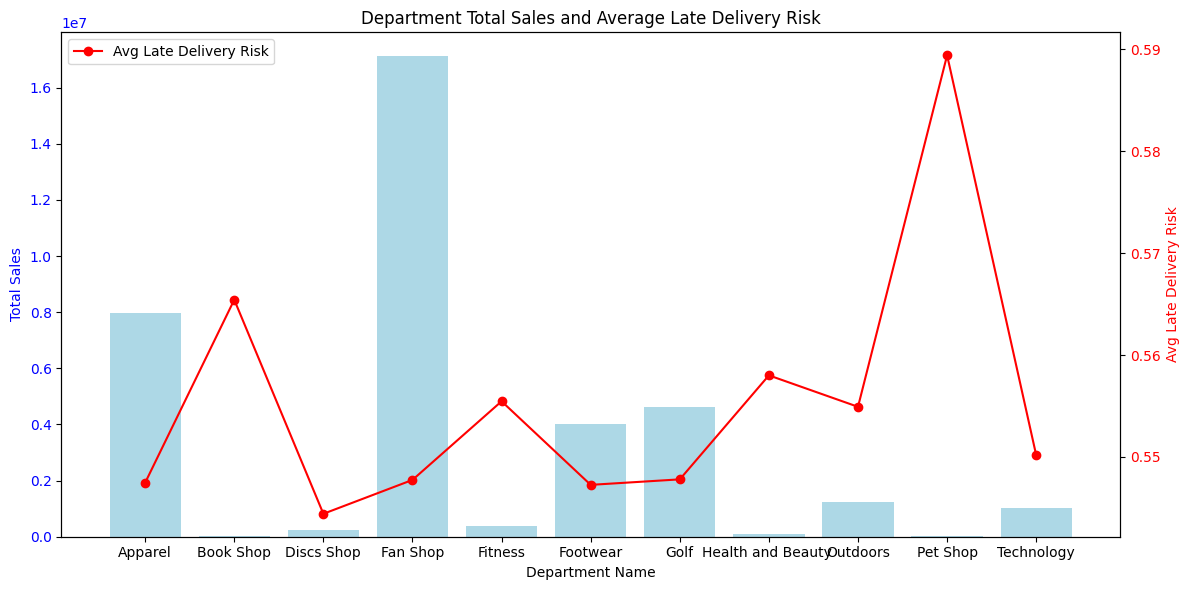

In [131]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Total Sales
ax1.bar(department_group['Department Name'], department_group['Total Sales'], color='lightblue', label='Total Sales')
ax1.set_xlabel('Department Name')
ax1.set_ylabel('Total Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plotting Average Late Delivery Risk on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(department_group['Department Name'], department_group['Avg Late Delivery Risk'], color='red', marker='o', label='Avg Late Delivery Risk')
ax2.set_ylabel('Avg Late Delivery Risk', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding title and legend
plt.title('Department Total Sales and Average Late Delivery Risk')
fig.tight_layout()
plt.legend(loc='upper left')
plt.show()

# Department Trend Analysis Conclusions

## Conclusion 1: Total Sales by Department
**Observation**:  
The Fan Shop leads in total sales, which correlates with the highest late delivery risk. Scheduled shipment times average 2.93 days, while actual delivery takes about 3.49 days, indicating a delay of approximately 0.56 days.

**Assumptions/Questions**:
- Does higher sales volume lead to increased strain on supply chains, contributing to delays?
- Which products are most frequently ordered in each department, and how much do they contribute to overall sales?
- What percentage of total sales is driven by these commonly ordered products?

## Conclusion 2: Shipping Delays
**Observation**:  
Across departments, the average shipping time is approximately 0.6 days longer than scheduled.

**Assumptions/Questions**:
- What are the primary causes of shipment delays? Could these factors be adjusted to align scheduled and actual delivery times more closely?
- If reducing delays is not feasible, how do these delays impact customer satisfaction and overall business performance?

## Analysis Breakdown
- **Total Sales by Department**: Analyzing total sales figures to understand revenue distribution across departments.
- **Average Sales per Customer**: Assessing customer value to identify which departments generate the most revenue per transaction.
- **Average Days for Shipment (Scheduled vs. Real)**: Comparing scheduled vs. actual delivery times to identify discrepancies and potential areas for improvement in logistics.
- **Late Delivery Risk**: Evaluating the average and total late delivery risks to pinpoint departments that face higher risks of delays.

## Data Highlights
- **Suspected Fraud**: Monitoring the percentage of suspected fraud orders per department to assess risk.
- **Late Delivery Risk**: Identifying departments like the Fan Shop, which, despite high sales, also faces significant delivery delays.


### Customer Segment Trend Analysis

In [132]:
schain['Year'] = schain['order date (DateOrders)'].dt.year

# Create a 'Month_Year' column by extracting the month number and year from 'order date (DateOrders)'
schain['Month_Year'] = schain['order date (DateOrders)'].dt.month.astype(str).str.zfill(2) + '/' + schain['order date (DateOrders)'].dt.year.astype(str)

# Now, group by 'Customer Segment', 'Customer State', 'Year', and 'Month_Year'
customer_segment_group = schain.groupby(['Customer Segment', 'Year', 'Month_Year']).agg({
    'Sales': 'sum',
    'Product Price': 'mean',  
    'Customer Id': 'count',  
    'Order Item Quantity': 'sum'
}).reset_index()

# Rename columns for clarity
customer_segment_group.columns = ['Customer Segment', 'Year', 'Month_Year', 'Total Sales', 'Average Product Price', 'Customer Count', 'Products Purchased Total']

# Round the results for easier readability
customer_segment_group = customer_segment_group.round(1)

In [133]:

customer_segment_group['Month_Year'] = pd.to_datetime(customer_segment_group['Month_Year'], format='%m/%Y')
customer_segment_group = customer_segment_group.sort_values(by=['Month_Year'])

# Create the bar plot (fig1) for Total Sales by Customer Segment (Month/Year)
fig1 = px.bar(
    customer_segment_group, 
    x='Month_Year', 
    y='Total Sales', 
    color='Customer Segment', 
    title='Total Sales by Customer Segment (Month/Year)', 
    labels={'Total Sales': 'Total Sales'},
    hover_data={'Total Sales': ':.1f'}
)

# Update x-axis to handle the month/year as categories
fig1.update_xaxes(type='category', tickmode='array', tickvals=customer_segment_group['Month_Year'], ticktext=customer_segment_group['Month_Year'].dt.strftime('%m %Y'))

fig1.show()

# Create the scatter plot (fig2) for Average Product Price by Customer Segment (Month/Year)
fig2 = px.scatter(
    customer_segment_group, 
    x='Month_Year', 
    y='Average Product Price', 
    size='Average Product Price', 
    color='Customer Segment',
    title='Average Product Price by Customer Segment (Month/Year)', 
    labels={'Average Product Price': 'Avg Product Price'},
    hover_data={'Average Product Price': ':.1f'}
)

# Ensure x-axis is properly formatted for categorical display
fig2.update_xaxes(type='category', tickmode='array', tickvals=customer_segment_group['Month_Year'], ticktext=customer_segment_group['Month_Year'].dt.strftime('%m %Y'))

fig2.show()

In [134]:
customer_segment_group = schain.groupby(['Customer Segment', 'Customer State']).agg({
    'Sales': 'sum'  # Aggregate Sales by state and customer segment
}).reset_index()

# Create the choropleth map for total sales by state and customer segment
fig = px.choropleth(
    customer_segment_group, 
    locations="Customer State",  # Locations corresponds to the 'Customer State' column
    locationmode='USA-states',  # This will interpret the 'Customer State' as U.S. states
    color="Sales",  # Sales will determine the color
    hover_name="Customer State",  # Display the state name on hover
    hover_data={
        "Sales": ':.1f',  # Show the total sales on hover
        "Customer Segment": True  # Display the customer segment on hover
    },
    title="Total Sales by Customer Segment and State",  # Map title
    color_continuous_scale=px.colors.sequential.Plasma,  # Set a color scale for sales
    scope="usa",  # Focus the map on the USA
    animation_frame="Customer Segment"  # Create animation by Customer Segment
)

# Show the interactive map
fig.show()

# Customer Segment Trend Analysis Conclusions

## Conclusions 1  Total Sales and Trends by Segment

- **Consumer Segment**: The total sales for the Consumer segment fluctuate throughout the years, peaking at around 468,440.0 in October 2017 and experiencing dips, especially in February 2017 (277,787.3). The general trend shows stable performance, with occasional spikes and drops.
- **Corporate Segment**: The Corporate segment follows a similar pattern but with generally lower peaks and more consistent sales. Sales peaked at 340,644.3 in September 2017 but also experienced noticeable drops in December 2017 and January 2018, reflecting possible seasonal effects or other disruptions.
- **Home Office Segment**: This segment shows a lower overall sales range, with a noticeable decline in November 2017 and December 2017. Sales were significantly lower in January 2018, with just 64,089.7, indicating potential end-of-year issues or seasonality.

## Conclusion 2 Sales per Customer and Product Price

- **Consumer Segment**: Average product prices in the Consumer segment hover around 130-135 but fluctuate from 124.6 in March 2015 to 168.1 in September 2017, indicating changes in the types of products sold or pricing strategies.
- **Corporate Segment**: Prices in the Corporate segment are somewhat steady, fluctuating between 126.1 and 159.9, which suggests a consistent but slightly higher average product price compared to the Consumer segment. A notable outlier is October 2017, where the average product price reached 451.7, likely due to larger or more expensive products sold during that month.
- **Home Office Segment**: Prices are generally consistent, ranging between 124.8 and 147.3, with a peak at 466.2 in October 2017, aligning with the trend in the other segments.

## Conclusion 3 Customer Count and Product Purchases

- **Consumer Segment**: The Consumer segment generally shows a high customer count (ranging from 1,400 to 1,800), correlating with a consistent number of products purchased, which typically aligns with 3,500 to 3,900 products per month.
- **Corporate Segment**: Customer count is relatively steady, ranging from 1,400 to 1,700, but with fewer products purchased per customer in comparison to the Consumer segment. This suggests that Corporate customers might be purchasing in bulk, with fewer but larger transactions.
- **Home Office Segment**: Customer count is lower compared to the other segments, with a range between 350 and 1,000, reflecting smaller operations or a more niche audience. Products purchased also range between 1,700 to 2,200, aligning with the lower sales volume.

## Data Highlights
### 4. Seasonality and Performance Analysis
- **Seasonal Drops**: Across all segments, there are noticeable dips in February 2017, November 2017, and December 2017, which could be due to post-holiday lulls or seasonal buying behavior.
- **End-of-Year Drop for Home Office**: The Home Office segment sees a significant drop in both November and December 2017, indicating either fewer customers or reduced product demand during these months, possibly due to end-of-year budget constraints or holiday season impacts.

### 5. Outliers and Abnormal Data

- **Consumer Segment (October 2017)**: The drastic sales spike of 468,440.0 with an average product price of 690.9 in October 2017 is an outlier and suggests a special event, promotion, or large bulk purchase that boosted sales.
- **Corporate Segment (October 2017)**: The high average price of 451.7 in October 2017, alongside 702 customers and 776 products, indicates either premium product sales or bulk purchases during that period.
- **Home Office Segment (October 2017)**: The October 2017 data in the Home Office segment shows an abnormal price spike of 466.2, paired with a sharp reduction in the number of customers and products purchased. This may indicate limited sales or a highly-specialized product offering in that period.


### Delivery Trend Analysis

In [135]:
# Group by Delivery Status and calculate summary statistics
delivery_status_summary = schain.groupby('Delivery Status').agg({
    'Sales': 'sum',
    'Days for shipping (real)': ['mean','min', 'max'],
    'Days for shipment (scheduled)': ['mean','min', 'max'],
    'SUSPECTED_FRAUD': 'sum',
    'Order Status': 'count'
}).reset_index()

delivery_status_summary.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in delivery_status_summary.columns.values]

delivery_status_summary['% Suspected Fraud'] = (delivery_status_summary['SUSPECTED_FRAUD_sum'] / delivery_status_summary['Order Status_count']) * 100

delivery_status_summary

,Delivery Status_,Sales_sum,Days for shipping (real)_mean,Days for shipping (real)_min,Days for shipping (real)_max,Days for shipment (scheduled)_mean,Days for shipment (scheduled)_min,Days for shipment (scheduled)_max,SUSPECTED_FRAUD_sum,Order Status_count,% Suspected Fraud
0,Advance shipping,8.518008e+06,2.498149,2,3,4.000000,4,4,0,41592,0.000000
1,Late delivery,2.012640e+07,4.089253,1,6,2.471069,0,4,0,98977,0.000000
2,Shipping canceled,1.570305e+06,3.476657,0,6,2.903921,0,4,4062,7754,52.385865
3,Shipping on time,6.570026e+06,2.975214,0,4,2.975214,0,4,0,32196,0.000000


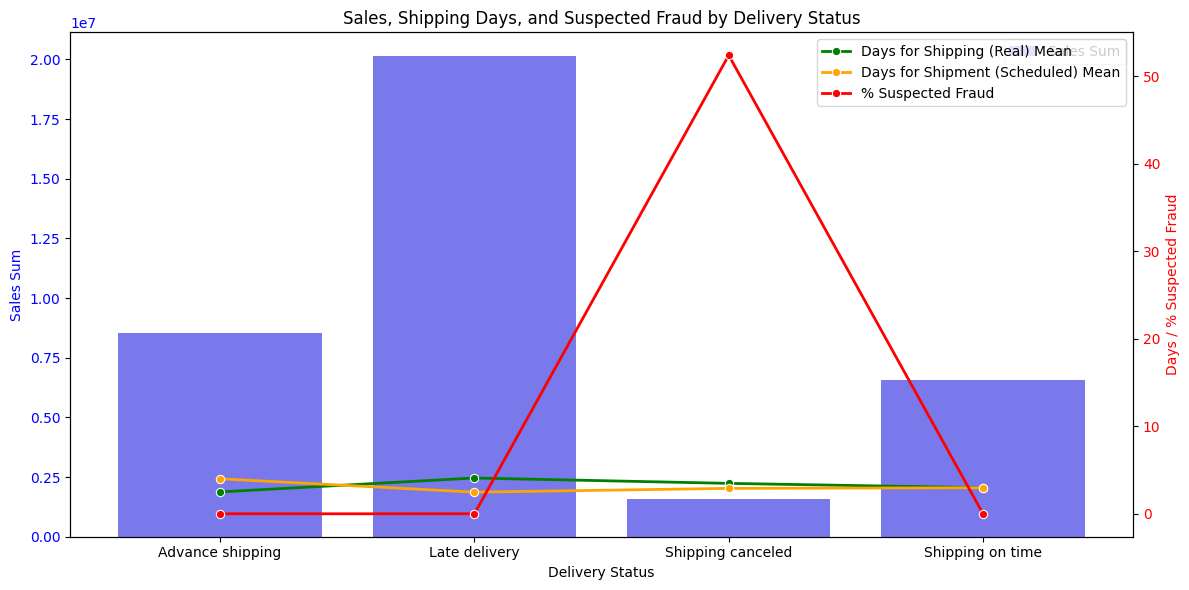

In [136]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting Sales sum
sns.barplot(data=delivery_status_summary, x='Delivery Status_', y='Sales_sum', ax=ax1, color='b', alpha=0.6, label='Sales Sum')
ax1.set_ylabel('Sales Sum', color='b')
ax1.set_xlabel('Delivery Status')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for Days for shipping and % Suspected Fraud
ax2 = ax1.twinx()

# Plotting Days for shipping (real)_mean
sns.lineplot(data=delivery_status_summary, x='Delivery Status_', y='Days for shipping (real)_mean', ax=ax2, color='g', marker='o', label='Days for Shipping (Real) Mean', linewidth=2)
# Plotting Days for shipment (scheduled)_mean
sns.lineplot(data=delivery_status_summary, x='Delivery Status_', y='Days for shipment (scheduled)_mean', ax=ax2, color='orange', marker='o', label='Days for Shipment (Scheduled) Mean', linewidth=2)

# Plotting % Suspected Fraud
sns.lineplot(data=delivery_status_summary, x='Delivery Status_', y='% Suspected Fraud', ax=ax2, color='r', marker='o', label='% Suspected Fraud', linewidth=2)

ax2.set_ylabel('Days / % Suspected Fraud', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Rotate x-axis labels vertically
plt.xticks(rotation=45)

# Title and layout adjustments
plt.title('Sales, Shipping Days, and Suspected Fraud by Delivery Status')
plt.tight_layout()

# Show the plot
plt.show()

In [137]:
schain['order date (DateOrders)'] = pd.to_datetime(schain['order date (DateOrders)'])

schain['Year'] = schain['order date (DateOrders)'].dt.to_period('Y')

delivery_status_summary2 = schain.groupby(['Category Name']).agg({
    'Sales': ['mean', 'sum', 'min', 'max'],
    'Days for shipping (real)': ['mean', 'min', 'max'],
    'Days for shipment (scheduled)': ['mean', 'min', 'max'],
    'SUSPECTED_FRAUD': 'sum',
    'Order Status': 'count'
}).reset_index()

# Flatten multi-level columns
delivery_status_summary.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in delivery_status_summary.columns.values]

# Calculate the percentage of suspected fraud
delivery_status_summary['% Suspected Fraud'] = (delivery_status_summary['SUSPECTED_FRAUD_sum'] / delivery_status_summary['Order Status_count']) * 100

delivery_status_summary2


Category Name        Sales                                          \
                                 mean           sum          min          max   
0            Accessories    75.096353  1.336715e+05    24.990000   124.949997   
1        As Seen on  TV!   302.910882  2.059794e+04    99.989998   499.950012   
2                  Baby     59.080002  1.222956e+04    59.080002    59.080002   
3    Baseball & Softball   148.824608  9.405715e+04    34.990002   299.950012   
4             Basketball   404.467602  2.709933e+04   299.989990   999.989990   
5                 Books     31.080000  1.258740e+04    31.080000    31.080000   
6           Boxing & MMA   201.431232  8.520541e+04    54.970001   474.950012   
7                   CDs     11.290000  3.059590e+03    11.290000    11.290000   
8               Cameras    452.040008  2.676077e+05   452.040008   452.040008   
9       Camping & Hiking   299.980011  4.118426e+06   299.980011   299.980011   
10      Cardio Equipment   295.895187  3.694843e+06    30.000000   499.950012   
11   Children's Clothing   357.100006  2.328292e+05   357.100006   357.100006   
12                Cleats   180.519848  4.431943e+06    59.990002   299.989990   
13             Computers  1500.000000  6.630000e+05  1500.000000  1500.000000   
14  Consumer Electronics   252.880005  1.089913e+05   252.880005   252.880005   
15                Crafts   461.480011  2.233563e+05   461.480011   461.480011   
16                  DVDs   164.380005  7.939554e+04   164.380005   164.380005   
17           Electronics   117.564843  3.710346e+05    27.990000   259.950012   
18               Fishing   399.980011  6.929654e+06   399.980011   399.980011   
19   Fitness Accessories   115.215018  3.560144e+04    34.990002   599.989990   
20                Garden   532.580017  2.577687e+05   532.580017   532.580017   
21        Girls' Apparel   126.316570  1.517062e+05    25.000000   350.000000   
22          Golf Apparel    79.296485  3.496975e+04    19.990000   129.990005   
23     Golf Bags & Carts   169.990005  1.036939e+04   169.990005   169.990005   
24            Golf Balls    52.269938  7.709816e+04    14.990000    99.949997   
25           Golf Gloves   109.061113  1.166954e+05     9.990000   399.950012   
26            Golf Shoes   206.103053  1.079980e+05    65.000000   500.000000   
27     Health and Beauty   293.040008  1.060805e+05   293.040008   293.040008   
28                Hockey    78.763403  4.836073e+04    22.000000   329.989990   
29    Hunting & Shooting   129.200955  5.684842e+04    29.990000   495.000000   
30  Indoor/Outdoor Games   149.704317  2.888994e+06    49.980000   249.899994   
31      Kids' Golf Clubs   257.285363  9.879758e+04    89.989998   599.989990   
32              Lacrosse   115.057696  3.946479e+04    24.990000   499.950012   
33        Men's Clothing   210.850006  4.385680e+04   210.850006   210.850006   
34        Men's Footwear   129.990005  2.891758e+06   129.990005   129.990005   
35      Men's Golf Clubs   166.204242  4.703580e+04    99.989998   499.950012   
36                 Music   260.649994  1.131221e+05   260.649994   260.649994   
37          Pet Supplies    84.400002  4.152480e+04    84.400002    84.400002   
38         Shop By Sport   119.220870  1.309522e+06    30.000000   199.990005   
39                Soccer   191.862680  2.647705e+04    79.989998   399.950012   
40        Sporting Goods   327.750000  1.170068e+05   327.750000   327.750000   
41     Strength Training   494.554320  5.489553e+04   189.000000  1999.989990   
42      Tennis & Racquet   135.930154  4.458509e+04    44.990002   224.949997   
43                  Toys    11.540000  6.104660e+03    11.540000    11.540000   
44              Trade-In    70.556242  6.872178e+04    15.990000   249.990005   
45           Video Games    39.750000  3.331050e+04    39.750000    39.750000   
46          Water Sports   200.376106  3.113845e+06   199.990005   349.989990   
47       Women's Apparel   149.645828  3.1

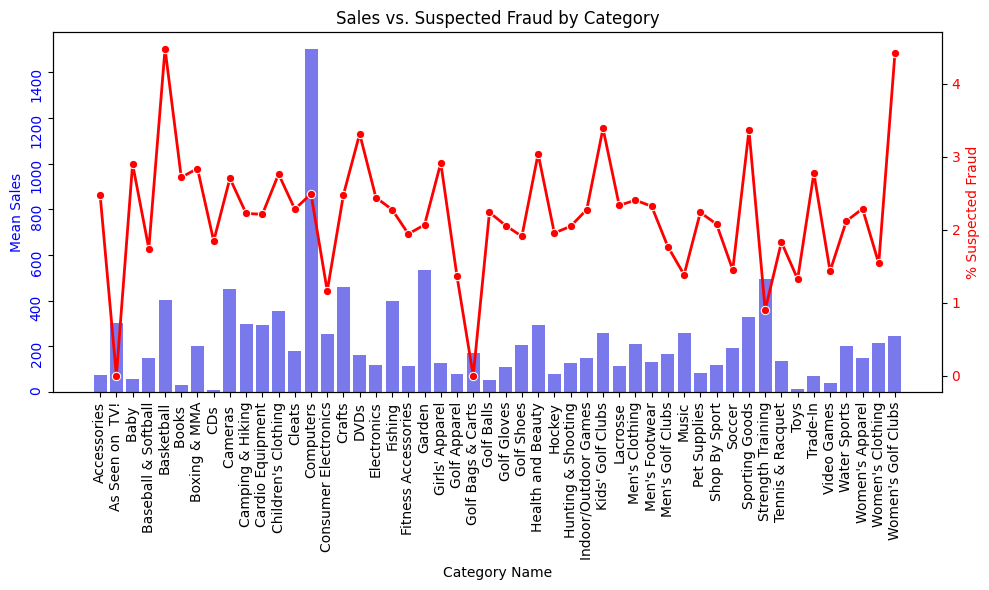

In [138]:
delivery_status_summary2.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in delivery_status_summary2.columns.values]

# Calculate the percentage of suspected fraud
delivery_status_summary2['% Suspected Fraud'] = (delivery_status_summary2['SUSPECTED_FRAUD_sum'] / delivery_status_summary2['Order Status_count']) * 100

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Sales mean on the primary y-axis
sns.barplot(data=delivery_status_summary2, x='Category Name_', y='Sales_mean', ax=ax1, color='b', alpha=0.6)
ax1.set_ylabel('Mean Sales', color='b')
ax1.set_xlabel('Category Name')
ax1.tick_params(axis='y', labelcolor='b', rotation = 90)

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

# Create a secondary y-axis for '% Suspected Fraud'
ax2 = ax1.twinx()
sns.lineplot(data=delivery_status_summary2, x='Category Name_', y='% Suspected Fraud', ax=ax2, color='r', marker='o', linewidth=2)
ax2.set_ylabel('% Suspected Fraud', color='r')
ax2.tick_params(axis='y', labelcolor='r')



plt.title('Sales vs. Suspected Fraud by Category')
plt.tight_layout()
plt.show()

In [139]:
delivery_status_summary3 = schain.groupby(['Year']).agg({
    'Sales': ['sum', 'min', 'max'],
    'Days for shipping (real)': ['mean', 'min', 'max'],
    'Days for shipment (scheduled)': ['mean', 'min', 'max'],
    'SUSPECTED_FRAUD': 'sum',
    'Order Status': 'count'
}).reset_index()

# Flatten multi-level columns
delivery_status_summary.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in delivery_status_summary.columns.values]

# Calculate the percentage of suspected fraud
delivery_status_summary['% Suspected Fraud'] = (delivery_status_summary['SUSPECTED_FRAUD_sum'] / delivery_status_summary['Order Status_count']) * 100

delivery_status_summary3

Year         Sales                     Days for shipping (real)          \
                  sum    min          max                     mean min max   
0  2015  1.234083e+07   9.99   499.950012                 3.498803   0   6   
1  2016  1.230382e+07   9.99   499.950012                 3.492294   0   6   
2  2017  1.180844e+07   9.99  1999.989990                 3.502350   0   6   
3  2018  3.316501e+05  11.54   532.580017                 3.504004   0   6   

  Days for shipment (scheduled)         SUSPECTED_FRAUD Order Status  
                           mean min max             sum        count  
0                      2.934381   0   4            1385        62650  
1                      2.923229   0   4            1376        62550  
2                      2.940616   0   4            1260        53196  
3                      2.891192   0   4              41         2123

/var/folders/_7/7nx4t_6s6995xg_cj866wrmr0000gn/T/ipykernel_40379/2431413624.py:13: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




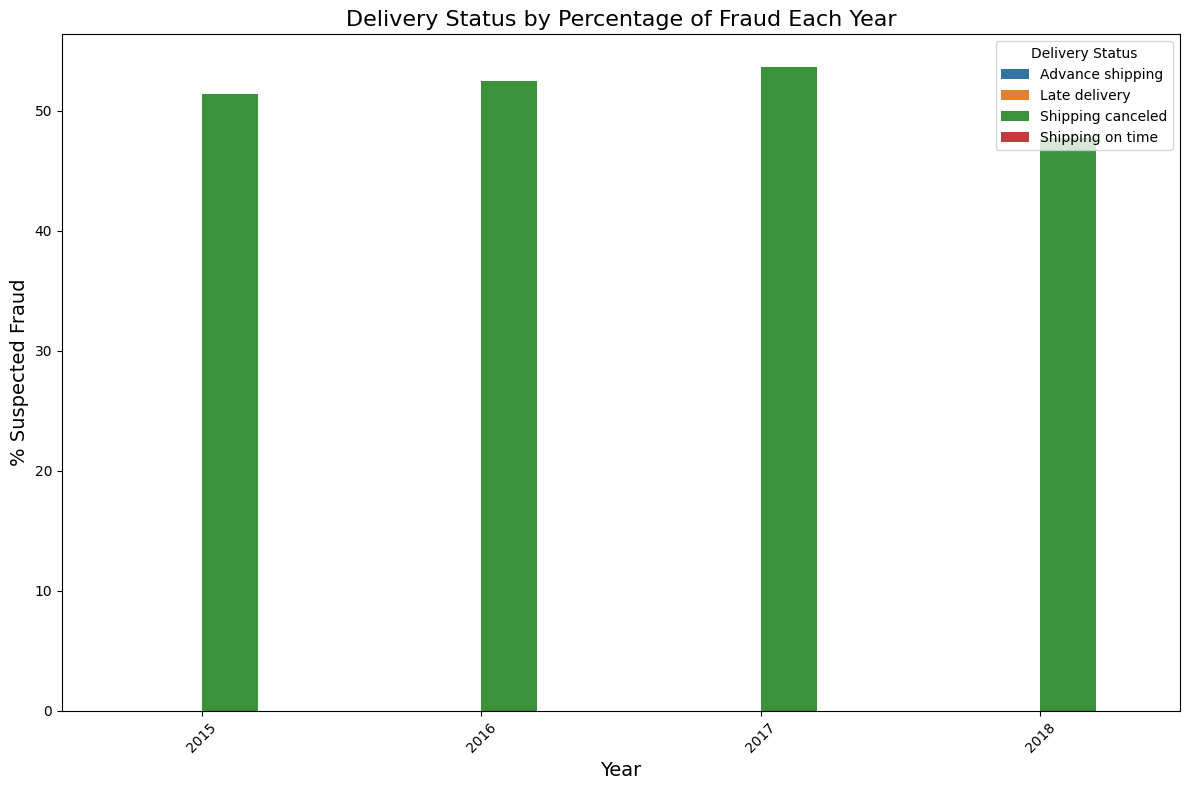

In [140]:
delivery_status_fraud = schain.groupby(['Year', 'Delivery Status']).agg({
    'SUSPECTED_FRAUD': 'sum',
    'Order Status': 'count'
}).reset_index()

# Calculate the fraud percentage
delivery_status_fraud['% Suspected Fraud'] = (delivery_status_fraud['SUSPECTED_FRAUD'] / delivery_status_fraud['Order Status']) * 100

# Plotting delivery status by percentage of fraud for each year
plt.figure(figsize=(12, 8))

# Create a bar plot showing fraud percentage by delivery status and year
sns.barplot(data=delivery_status_fraud, 
            x='Year', 
            y='% Suspected Fraud', 
            hue='Delivery Status', 
            ci=None, 
            estimator='mean', 
            dodge=True)

# Title and labels
plt.title('Delivery Status by Percentage of Fraud Each Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('% Suspected Fraud', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [150]:
schain.to_csv('DataCoSupplyChainDataset_clean.csv', index = False)